In [477]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [479]:
df = pd.read_excel('Master Sheet updated- Top 100 Work Light.xlsx')
df.head()

,Date,Product_Category,Product Details,ASIN,Top 100 ASIN,Lumens,Battery Runtime,Power Source,IP Rating,Material,...,Images,Review velocity,seller,Category,Size Tier,Fulfillment,Dimensions,Weight,Creation Date,Power Source.1
0,2024-05-01,Work Light,"Rechargeable Work Light, 25W Led Work Light wi...",B0CD7B5SQ6,B0CD7B5SQ6,2000.0,5hr,Rechargeable Battery,NaN,Metal,...,7,3.0,NaN,Tools & Home Improvement,Large Standard-Size,FBA,12.99 x 3.50 x 8.98 in,1.650000,2023-07-31 00:00:00,Battery Powered
1,2024-05-01,Work Light,10000LM 466 LED Solar Rechargeable Work Light ...,B0BZY4J3PV,B0BZY4J3PV,10000.0,NaN,"Hybrid (Solar, USB)",66,"Aluminum, Plastic",...,8,16.0,NaN,Tools & Home Improvement,Large Standard-Size,FBA,9.17 x 2.17 x 7.48 in,1.900000,2023-07-04 00:00:00,NaN
2,2024-01-01,Work Light,"DEWALT 20V MAX LED Work Light, 3000 Lumens of ...",B077ZCTBFY,NaN,NaN,NaN,NaN,NaN,NaN,...,8,25.0,Amazon,Tools & Home Improvement,Small Oversize,AMZ,10.6x10.1x41.0,20.954115,"Dec 9, 2017",NaN
3,2024-01-01,Work Light,"DEWALT 12V/20V MAX LED Work Light, Compact wit...",B088XWTWPM,B088XWTWPM,2000.0,NaN,Rechargeable Battery,54,Blend,...,8,26.0,Fleet Tool,Tools & Home Improvement,Large Standard-Size,MFN,8.0x5.1x10.2,3.373650,"May 20, 2020",NaN
4,2024-01-01,Work Light,"DEWALT 20V MAX LED Work Light, Handheld Spotli...",B00SKOCRCW,B00SKOCRCW,1500.0,NaN,Rechargeable Battery,54,Plastic,...,15,248.0,Tool Liquidator LLC,Tools & Home Improvement,Large Standard-Size,FBA,6.5x3.7x9.1,1.719900,"Jan 22, 2015",NaN


In [481]:
df.describe()

,Date,Lumens,Price,Sales,Revenue,BSR,Fees,Active Sellers,Ratings,Reviews,Images,Review velocity,Weight
count,600,401.000000,598.000000,559.000000,557.000000,600.000000,594.000000,600.000000,600.000000,600.000000,600.000000,587.000000,596.000000
mean,2024-03-16 20:00:00,3987.581047,42.991722,791.522361,32741.117307,20811.841667,12.587475,4.895000,4.526500,1674.685000,7.138333,26.689949,2.294950
min,2024-01-01 00:00:00,140.000000,4.990000,21.000000,543.910000,559.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.020000
25%,2024-02-01 00:00:00,1000.000000,23.040000,359.000000,10557.360000,13475.750000,8.930000,1.000000,4.400000,188.000000,6.000000,8.000000,0.729413
50%,2024-03-16 12:00:00,2100.000000,32.990000,505.000000,17936.550000,21369.000000,10.350000,1.000000,4.500000,708.500000,7.000000,15.000000,1.190599
75%,2024-05-01 00:00:00,4800.000000,45.990000,739.000000,29473.080000,28747.500000,13.427500,3.000000,4.700000,2075.750000,8.000000,26.000000,1.832500
max,2024-06-01 00:00:00,21000.000000,229.000000,15659.000000,747150.000000,41210.000000,55.780000,57.000000,5.000000,20252.000000,15.000000,1415.000000,20.954115
std,NaN,5241.632893,32.063496,1260.043891,63967.383460,9412.059434,7.200212,8.394726,0.254734,3022.350013,1.849748,65.808642,3.309542


In [404]:
import pandas as pd

# Load the dataset
file_path = 'Master Sheet updated- Top 100 Work Light.xlsx' 
df = pd.read_excel(file_path)

# Ensure that the columns 'Revenue' and 'Brand' exist in the DataFrame
if 'Revenue' in df.columns and 'Brand' in df.columns:
    # Group by 'Brand' and sum the 'Revenue'
    brand_revenue = df.groupby('Brand')['Revenue'].sum().reset_index()

    # Sort the grouped DataFrame by 'Revenue' in descending order
    top_10_brands_by_revenue = brand_revenue.sort_values(by='Revenue', ascending=False).head(10)

    # Display the top 10 brands by revenue
    print(top_10_brands_by_revenue)
else:
    print("The DataFrame does not contain 'Revenue' and/or 'Brand' columns.")

           Brand     Revenue
19        DEWALT  5551500.22
16      Coquimbo   922766.42
54     Milwaukee   886578.53
48     LIVOWALNY   785993.69
36        GUWELL   719618.55
31        Ecarke   520797.67
112      ropelux   486500.07
40       HOTLIGH   410057.46
81   Streamlight   368546.46
58         NEIKO   334989.35


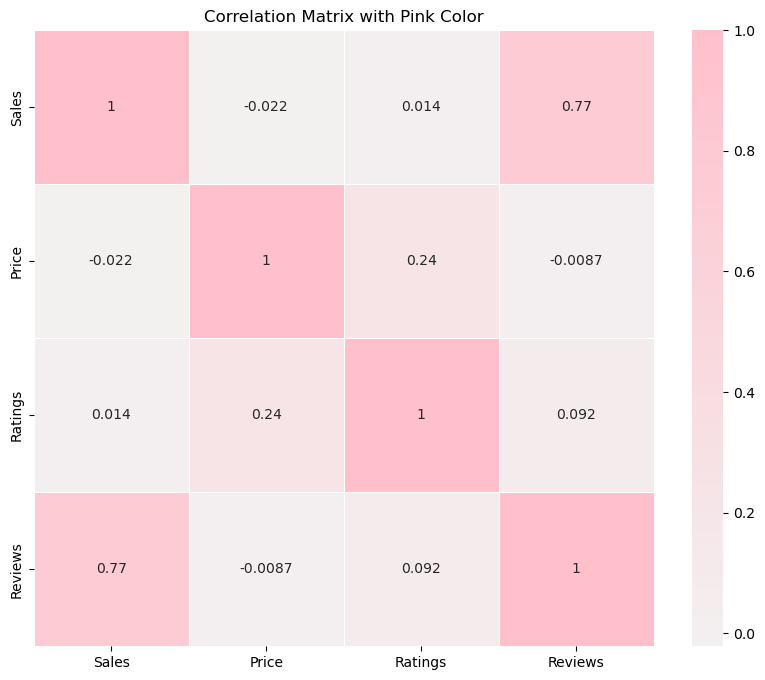

In [406]:
# Select the relevant columns
relevant_columns = ['Sales', 'Price', 'Ratings', 'Reviews']
correlation_data = df[relevant_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.light_palette("pink", as_cmap=True), linewidths=0.5)
plt.title('Correlation Matrix with Pink Color')
plt.show()

09:24:28 - cmdstanpy - INFO - Chain [1] start processing
09:24:28 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



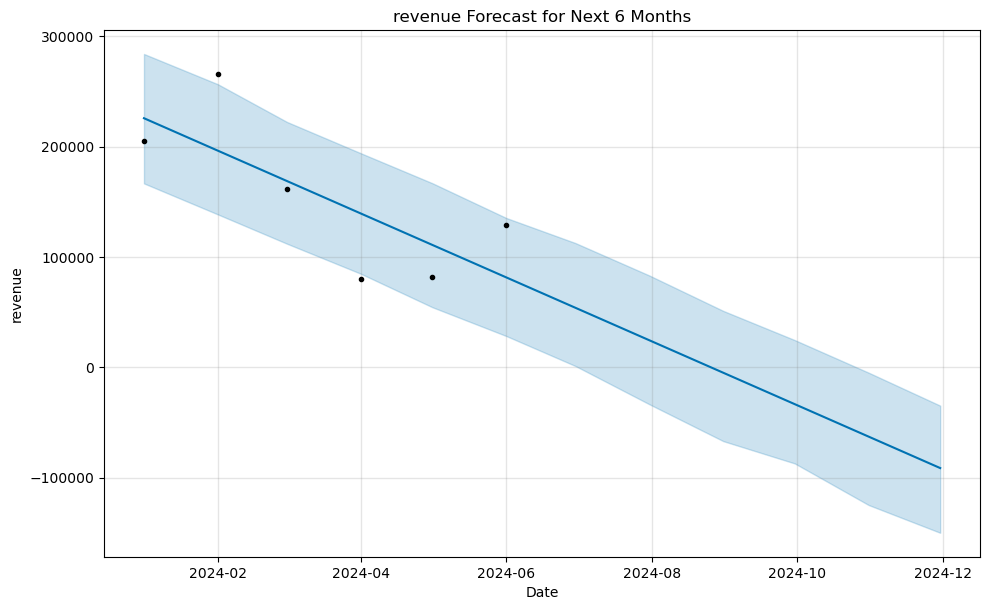

,ds,yhat,yhat_lower,yhat_upper
6,2024-06-30,53926.176612,1164.736863,112607.227235
7,2024-07-31,24499.206671,-33482.358686,83218.904167
8,2024-08-31,-4927.763269,-66892.777907,51139.719081
9,2024-09-30,-33405.476115,-87130.682921,24666.019639
10,2024-10-31,-62832.446056,-124826.898987,-4865.233832
11,2024-11-30,-91310.158901,-149957.806688,-34723.778356


In [485]:
# Creating the DataFrame from the provided data
data = {
    'date': ['1/1/24', '2/1/24', '3/1/24', '4/1/24', '5/1/24', '6/1/24'],
    'revenue': [204780.47, 266046.41, 161307.39, 80427.38, 81605.56, 128599.21]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df = df.rename(columns={'date': 'ds', 'revenue': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create a DataFrame for future predictions (next 6 months)
future = model.make_future_dataframe(periods=6, freq='M')

# Predict future sales
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('revenue Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('revenue')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

09:25:34 - cmdstanpy - INFO - Chain [1] start processing
09:25:35 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



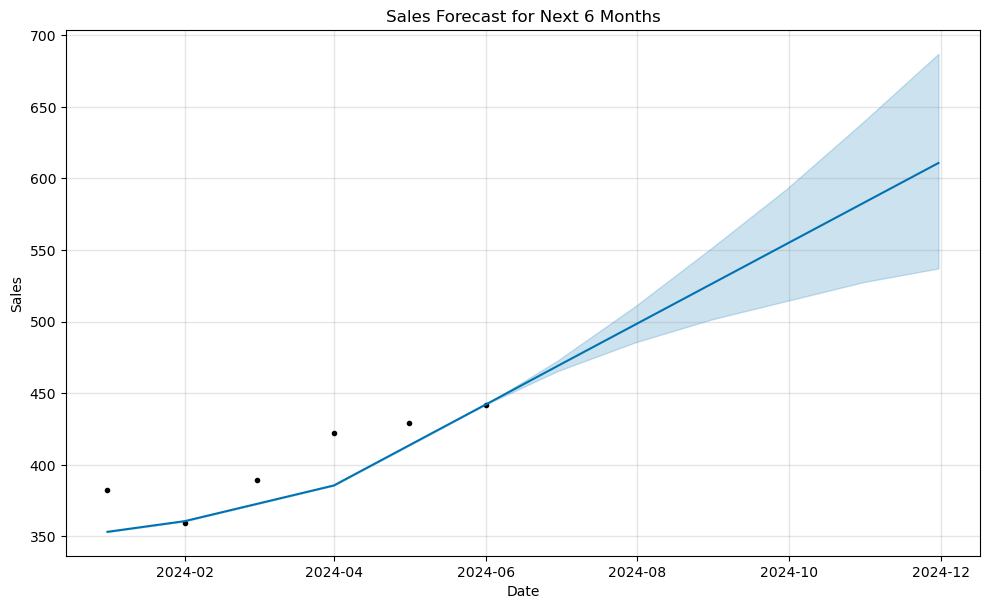

,ds,yhat,yhat_lower,yhat_upper
6,2024-06-30,469.016148,465.430897,472.822330
7,2024-07-31,497.727660,485.355988,510.507675
8,2024-08-31,526.439171,501.537768,551.579284
9,2024-09-30,554.219094,514.350373,592.655590
10,2024-10-31,582.930605,527.540964,639.768116
11,2024-11-30,610.710529,537.071746,686.986763


In [487]:

# Creating the DataFrame from the provided data
data = {
    'date': ['1/1/24', '2/1/24', '3/1/24', '4/1/24', '5/1/24', '6/1/24'],
    'sales': [382, 359, 389, 422, 429, 442],
    'price': [112.79, 118.99, 118.99, 112.16, 118.99, 118.99],
    'ratings': [4.7, 4.8, 4.7, 4.7, 4.7, 4.8],
    'reviews': [30166, 26464, 22164, 22308, 23667, 25131]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df = df.rename(columns={'date': 'ds', 'sales': 'y'})

# Initialize the Prophet model
model = Prophet()

# Adding additional regressors
model.add_regressor('price')
model.add_regressor('ratings')
model.add_regressor('reviews')

# Fit the model
model.fit(df)

# Create a DataFrame for future predictions (next 6 months)
future = model.make_future_dataframe(periods=6, freq='M')

# Add the same additional columns to the future DataFrame
# Here we use the last known values or logical assumptions for simplicity
future['price'] = df['price'].iloc[-1]
future['ratings'] = df['ratings'].iloc[-1]
future['reviews'] = df['reviews'].iloc[-1] + (future['ds'].dt.month - df['ds'].dt.month.iloc[-1]) * 250

# Predict future sales
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


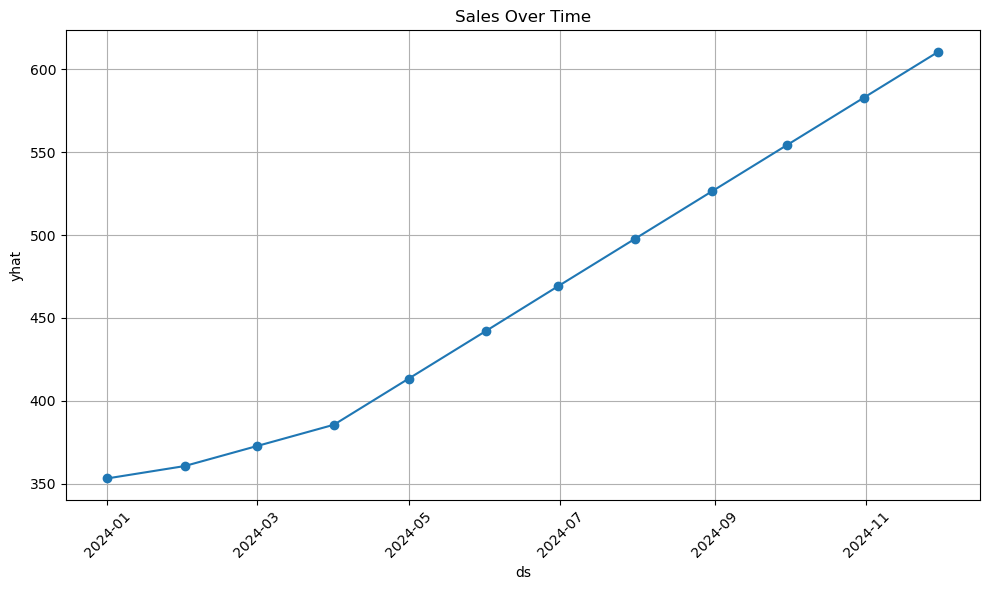

In [436]:
# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('ds')
plt.ylabel('yhat')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [525]:
def model_new_test(df,asin):

    df = df[['ds','y','Price','Ratings']][df['ASIN'] == asin]
    df = df.sort_values(by='ds')

    # Initialize the Prophet model
    model = Prophet(
        seasonality_mode='multiplicative',  # or 'additive'
        changepoint_prior_scale=0.5,  # Adjust based on data
        seasonality_prior_scale=10.0  # Adjust based on data
    )
    
    # Adding additional regressors
    model.add_regressor('Price')
    model.add_regressor('Ratings')
    # model.add_regressor('Reviews')
    
    # Fit the model
    model.fit(df)
    
    # Create a DataFrame for future predictions (next 6 months)
    future = model.make_future_dataframe(periods=7, freq='M')
    
    # Add the same additional columns to the future DataFrame
    # Here we use the last known values or logical assumptions for simplicity
    future['Price'] = df['Price'].iloc[-1]
    future['Ratings'] = df['Ratings'].iloc[-1]
    # future['Reviews'] = df['Reviews'].iloc[-1] + (future['ds'].dt.month - df['ds'].dt.month.iloc[-1]) * 250
    
    # Predict future sales
    forecast = model.predict(future)
    
    # Display forecasted values
    forecast['ASIN'] = asin

    # Filter out existing dates
    forecast = forecast[forecast['ds'] > df['ds'].max()]
    
    return forecast[['ds', 'ASIN', 'yhat', 'yhat_lower', 'yhat_upper']]

In [527]:
df = pd.read_excel('Master Sheet updated- Top 100 Work Light.xlsx')

df = df[['Date','ASIN','Top 100 ASIN','Sales','Price','Ratings','Reviews']]

# Remove rows where 'Top 100 ASIN' is either missing or marked as '#N/A'
df = df[df['Top 100 ASIN'].notnull() & (df['Top 100 ASIN'] != '#N/A')]

# Ensure that 'Sales' has a value
df = df[df['Sales'].notnull()]


df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Get unique ASIN values
unique_asins = df['ASIN'].unique()

# Initialize a DataFrame to store all predictions
all_predictions = pd.DataFrame()

for asin in unique_asins:
    try:
        forecast = model_new_test(df, asin)
        all_predictions = pd.concat([all_predictions, forecast], ignore_index=True)
    except Exception as e:
        print(f"Error processing ASIN {asin}: {e}")

# Save all predictions to a CSV file
all_predictions.to_csv('all_asin_predictions.csv', index=False)

print(all_predictions)

14:41:44 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CD7B5SQ6: Dataframe has less than 2 non-NaN rows.
Error processing ASIN B0BZY4J3PV: Found NaN in column 'Price'


14:41:45 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:46 - cmdstanpy - INFO - Chain [1] start processing
14:41:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:46 - cmdstanpy - INFO - Chain [1] start processing
14:41:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:47 - cmdstanpy - INFO - Chain [1] start processing
14:41:48 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

Error processing ASIN B0B2DB7V4J: Dataframe has less than 2 non-NaN rows.


14:41:50 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:50 - cmdstanpy - INFO - Chain [1] start processing
14:41:51 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:51 - cmdstanpy - INFO - Chain [1] start processing
14:41:52 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:52 - cmdstanpy - INFO - Chain [1] start processing
14:41:52 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

Error processing ASIN B08ZHCZ512: Dataframe has less than 2 non-NaN rows.


14:41:53 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:53 - cmdstanpy - INFO - Chain [1] start processing
14:41:54 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:54 - cmdstanpy - INFO - Chain [1] start processing
14:41:55 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:41:55 - cmdstanpy - INFO - Chain [1] start processing
14:41:55 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

Error processing ASIN B0BDJ5SKR9: Dataframe has less than 2 non-NaN rows.


14:42:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:02 - cmdstanpy - INFO - Chain [1] start processing
14:42:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:02 - cmdstanpy - INFO - Chain [1] start processing
14:42:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:02 - cmdstanpy - INFO - Chain [1] start processing
14:42:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

Error processing ASIN B0BNQ8MBHS: Dataframe has less than 2 non-NaN rows.


14:42:12 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:12 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0BS3RS88S: Dataframe has less than 2 non-NaN rows.


14:42:13 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:13 - cmdstanpy - INFO - Chain [1] start processing
14:42:13 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:13 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CK24ZMWD: Dataframe has less than 2 non-NaN rows.


14:42:14 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:14 - cmdstanpy - INFO - Chain [1] start processing
14:42:14 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:14 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CTMMNY7W: Dataframe has less than 2 non-NaN rows.
Error processing ASIN B0B428DYN8: Dataframe has less than 2 non-NaN rows.


14:42:15 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:15 - cmdstanpy - INFO - Chain [1] start processing
14:42:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:16 - cmdstanpy - INFO - Chain [1] start processing
14:42:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

14:42:16 - cmdstanpy - INFO - Chain [1] start processing
14:42:18 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

Error processing ASIN B09G9RPR4G: Dataframe has less than 2 non-NaN rows.
Error processing ASIN B0CCKT3HJH: Dataframe has less than 2 non-NaN rows.


14:42:25 - cmdstanpy - INFO - Chain [1] done processing


            ds        ASIN         yhat    yhat_lower   yhat_upper
0   2024-05-31  B088XWTWPM   392.833707    203.728771   582.431277
1   2024-06-30  B088XWTWPM   270.661024   -316.480108   884.251123
2   2024-07-31  B088XWTWPM   144.415917  -1013.717626  1343.340136
3   2024-08-31  B088XWTWPM    18.170811  -1779.934075  1888.798695
4   2024-09-30  B088XWTWPM  -104.001873  -2589.868105  2552.339863
..         ...         ...          ...           ...          ...
604 2024-07-31  B001BM5YZW  -719.551529  -3834.559208  2433.932056
605 2024-08-31  B001BM5YZW -1169.059646  -6224.647005  3738.179627
606 2024-09-30  B001BM5YZW -1604.067501  -8734.250251  5414.652546
607 2024-10-31  B001BM5YZW -2053.575618 -11534.539435  7208.426595
608 2024-11-30  B001BM5YZW -2488.583474 -14262.147616  9686.505830

[609 rows x 5 columns]


/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [497]:
# Read the Excel file
df = pd.read_excel('Master Sheet updated- Top 100 Work Light.xlsx')

df.head()

,Date,Product_Category,Product Details,ASIN,Top 100 ASIN,Lumens,Battery Runtime,Power Source,IP Rating,Material,...,Images,Review velocity,seller,Category,Size Tier,Fulfillment,Dimensions,Weight,Creation Date,Power Source.1
0,2024-05-01,Work Light,"Rechargeable Work Light, 25W Led Work Light wi...",B0CD7B5SQ6,B0CD7B5SQ6,2000.0,5hr,Rechargeable Battery,NaN,Metal,...,7,3.0,NaN,Tools & Home Improvement,Large Standard-Size,FBA,12.99 x 3.50 x 8.98 in,1.650000,2023-07-31 00:00:00,Battery Powered
1,2024-05-01,Work Light,10000LM 466 LED Solar Rechargeable Work Light ...,B0BZY4J3PV,B0BZY4J3PV,10000.0,NaN,"Hybrid (Solar, USB)",66,"Aluminum, Plastic",...,8,16.0,NaN,Tools & Home Improvement,Large Standard-Size,FBA,9.17 x 2.17 x 7.48 in,1.900000,2023-07-04 00:00:00,NaN
2,2024-01-01,Work Light,"DEWALT 20V MAX LED Work Light, 3000 Lumens of ...",B077ZCTBFY,NaN,NaN,NaN,NaN,NaN,NaN,...,8,25.0,Amazon,Tools & Home Improvement,Small Oversize,AMZ,10.6x10.1x41.0,20.954115,"Dec 9, 2017",NaN
3,2024-01-01,Work Light,"DEWALT 12V/20V MAX LED Work Light, Compact wit...",B088XWTWPM,B088XWTWPM,2000.0,NaN,Rechargeable Battery,54,Blend,...,8,26.0,Fleet Tool,Tools & Home Improvement,Large Standard-Size,MFN,8.0x5.1x10.2,3.373650,"May 20, 2020",NaN
4,2024-01-01,Work Light,"DEWALT 20V MAX LED Work Light, Handheld Spotli...",B00SKOCRCW,B00SKOCRCW,1500.0,NaN,Rechargeable Battery,54,Plastic,...,15,248.0,Tool Liquidator LLC,Tools & Home Improvement,Large Standard-Size,FBA,6.5x3.7x9.1,1.719900,"Jan 22, 2015",NaN


In [557]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def model_new_test(df, asin):
    df = df[['ds', 'y', 'Price', 'Ratings']][df['ASIN'] == asin]
    df = df.sort_values(by='ds')

    # Define train_end_date to cover enough historical data
    train_end_date = df['ds'].max() - pd.DateOffset(months=1)
    train_df = df[df['ds'] <= train_end_date]
    test_df = df[df['ds'] > train_end_date]

    if len(train_df) < 2 or len(test_df) < 1:
        raise ValueError("Dataframe has less than 2 non-NaN rows for training or no test data available.")

    # print(f"ASIN: {asin}")
    # print(f"Training set dates: {train_df['ds'].min()} to {train_df['ds'].max()}")
    # print(f"Testing set dates: {test_df['ds'].min()} to {test_df['ds'].max()}")

    # Initialize and fit the Prophet model
    model = Prophet(
        seasonality_mode='multiplicative',  # or 'additive'
        changepoint_prior_scale=0.2,  # Adjust based on data
        seasonality_prior_scale=5.0,  # Adjust based on data
        interval_width=0.95
    )
    model.add_regressor('Price')
    model.add_regressor('Ratings')
    model.fit(train_df)

    # Create a DataFrame for future predictions matching test dates
    future = test_df[['ds']].copy()
    future['Price'] = test_df['Price'].values  # Use the corresponding test values
    future['Ratings'] = test_df['Ratings'].values  # Use the corresponding test values

    # print(f"Future DataFrame:\n{future}")

    # Predict future sales
    forecast = model.predict(future)
    forecast['ASIN'] = asin

    # Merge forecast with actual test data
    forecast = forecast.set_index('ds').join(test_df.set_index('ds'), lsuffix='_pred', rsuffix='_actual')
    # print(f"Forecast head:\n{forecast.head()}")

    return forecast[['yhat', 'y', 'yhat_lower', 'yhat_upper']]

# Read the Excel file
df = pd.read_excel('Master Sheet updated- Top 100 Work Light.xlsx')

# Select relevant columns
df = df[['Date', 'ASIN', 'Top 100 ASIN', 'Sales', 'Price', 'Ratings', 'Reviews']]

# Remove rows where 'Top 100 ASIN' is either missing or marked as '#N/A'
df = df[df['Top 100 ASIN'].notnull() & (df['Top 100 ASIN'] != '#N/A')]

# Ensure that 'Sales' has a value
df = df[df['Sales'].notnull()]

# Convert 'Date' to datetime and rename columns
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Get unique ASIN values
unique_asins = df['ASIN'].unique()

# Initialize a DataFrame to store all predictions
all_predictions = pd.DataFrame()

# Loop through each unique ASIN and generate forecasts
for asin in unique_asins:
    try:
        forecast = model_new_test(df, asin)
        all_predictions = pd.concat([all_predictions, forecast.reset_index()], ignore_index=True)
    except Exception as e:
        print(f"Error processing ASIN {asin}: {e}")

# Debug output: Check if 'y' column exists in all_predictions
print("Columns in all_predictions:", all_predictions.columns)

# Calculate accuracy metrics
if 'y' in all_predictions.columns and 'yhat' in all_predictions.columns:
    y_actual = all_predictions['y'].dropna()
    y_pred = all_predictions['yhat'].dropna()

    print(f"Number of actual values: {len(y_actual)}")
    print(f"Number of predicted values: {len(y_pred)}")

    if len(y_actual) > 0 and len(y_pred) > 0:
        mae = mean_absolute_error(y_actual, y_pred)
        mse = mean_squared_error(y_actual, y_pred)
        mape = mean_absolute_percentage_error(y_actual, y_pred)

        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"MAPE: {mape}")
    else:
        print("Error: Mismatch in number of actual and predicted values")
else:
    print("Error: 'y' or 'yhat' column not found in all_predictions")

# Save all predictions to a CSV file
all_predictions.to_csv('all_asin_predictions.csv', index=False)

# Print all predictions
print(all_predictions)


15:03:35 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CD7B5SQ6: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0BZY4J3PV: Found NaN in column 'Price'


15:03:36 - cmdstanpy - INFO - Chain [1] done processing
15:03:36 - cmdstanpy - INFO - Chain [1] start processing
15:03:37 - cmdstanpy - INFO - Chain [1] done processing
15:03:37 - cmdstanpy - INFO - Chain [1] start processing
15:03:38 - cmdstanpy - INFO - Chain [1] done processing
15:03:38 - cmdstanpy - INFO - Chain [1] start processing
15:03:39 - cmdstanpy - INFO - Chain [1] done processing
15:03:39 - cmdstanpy - INFO - Chain [1] start processing
15:03:40 - cmdstanpy - INFO - Chain [1] done processing
15:03:40 - cmdstanpy - INFO - Chain [1] start processing
15:03:40 - cmdstanpy - INFO - Chain [1] done processing
15:03:40 - cmdstanpy - INFO - Chain [1] start processing
15:03:42 - cmdstanpy - INFO - Chain [1] done processing
15:03:42 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B08YS6CXG6: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0B2DB7V4J: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:42 - cmdstanpy - INFO - Chain [1] done processing
15:03:42 - cmdstanpy - INFO - Chain [1] start processing
15:03:43 - cmdstanpy - INFO - Chain [1] done processing
15:03:43 - cmdstanpy - INFO - Chain [1] start processing
15:03:44 - cmdstanpy - INFO - Chain [1] done processing
15:03:44 - cmdstanpy - INFO - Chain [1] start processing
15:03:44 - cmdstanpy - INFO - Chain [1] done processing
15:03:44 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B077HX6T6W: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:45 - cmdstanpy - INFO - Chain [1] done processing
15:03:45 - cmdstanpy - INFO - Chain [1] start processing
15:03:45 - cmdstanpy - INFO - Chain [1] done processing
15:03:45 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B08ZHCZ512: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0CP6RGBH7: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0CP9H5WW3: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0BRK5NVH3: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:45 - cmdstanpy - INFO - Chain [1] done processing
15:03:45 - cmdstanpy - INFO - Chain [1] start processing
15:03:46 - cmdstanpy - INFO - Chain [1] done processing
15:03:46 - cmdstanpy - INFO - Chain [1] start processing
15:03:46 - cmdstanpy - INFO - Chain [1] done processing
15:03:46 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CY44B3Z2: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:47 - cmdstanpy - INFO - Chain [1] done processing
15:03:47 - cmdstanpy - INFO - Chain [1] start processing
15:03:47 - cmdstanpy - INFO - Chain [1] done processing
15:03:47 - cmdstanpy - INFO - Chain [1] start processing
15:03:48 - cmdstanpy - INFO - Chain [1] done processing
15:03:48 - cmdstanpy - INFO - Chain [1] start processing
15:03:49 - cmdstanpy - INFO - Chain [1] done processing
15:03:49 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0BRMBBF15: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:50 - cmdstanpy - INFO - Chain [1] done processing
15:03:50 - cmdstanpy - INFO - Chain [1] start processing
15:03:51 - cmdstanpy - INFO - Chain [1] done processing
15:03:51 - cmdstanpy - INFO - Chain [1] start processing
15:03:52 - cmdstanpy - INFO - Chain [1] done processing
15:03:52 - cmdstanpy - INFO - Chain [1] start processing
15:03:53 - cmdstanpy - INFO - Chain [1] done processing
15:03:53 - cmdstanpy - INFO - Chain [1] start processing
15:03:54 - cmdstanpy - INFO - Chain [1] done processing
15:03:54 - cmdstanpy - INFO - Chain [1] start processing
15:03:55 - cmdstanpy - INFO - Chain [1] done processing
15:03:55 - cmdstanpy - INFO - Chain [1] start processing
15:03:55 - cmdstanpy - INFO - Chain [1] done processing
15:03:55 - cmdstanpy - INFO - Chain [1] start processing
15:03:56 - cmdstanpy - INFO - Chain [1] done processing
15:03:56 - cmdstanpy - INFO - Chain [1] start processing
15:03:56 - cmdstanpy - INFO - Chain [1] done processing
15:03:56 - cmdstanpy - INFO - Chain [1] 

Error processing ASIN B0BDJ5SKR9: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:03:58 - cmdstanpy - INFO - Chain [1] done processing
15:03:58 - cmdstanpy - INFO - Chain [1] start processing
15:03:58 - cmdstanpy - INFO - Chain [1] done processing
15:03:58 - cmdstanpy - INFO - Chain [1] start processing
15:03:59 - cmdstanpy - INFO - Chain [1] done processing
15:03:59 - cmdstanpy - INFO - Chain [1] start processing
15:04:00 - cmdstanpy - INFO - Chain [1] done processing
15:04:00 - cmdstanpy - INFO - Chain [1] start processing
15:04:01 - cmdstanpy - INFO - Chain [1] done processing
15:04:01 - cmdstanpy - INFO - Chain [1] start processing
15:04:02 - cmdstanpy - INFO - Chain [1] done processing
15:04:02 - cmdstanpy - INFO - Chain [1] start processing
15:04:02 - cmdstanpy - INFO - Chain [1] done processing
15:04:02 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B09FLXTFDP: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B07L5ZYGM6: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:03 - cmdstanpy - INFO - Chain [1] done processing
15:04:03 - cmdstanpy - INFO - Chain [1] start processing
15:04:04 - cmdstanpy - INFO - Chain [1] done processing
15:04:04 - cmdstanpy - INFO - Chain [1] start processing
15:04:04 - cmdstanpy - INFO - Chain [1] done processing
15:04:04 - cmdstanpy - INFO - Chain [1] start processing
15:04:04 - cmdstanpy - INFO - Chain [1] done processing
15:04:04 - cmdstanpy - INFO - Chain [1] start processing
15:04:05 - cmdstanpy - INFO - Chain [1] done processing
15:04:05 - cmdstanpy - INFO - Chain [1] start processing
15:04:06 - cmdstanpy - INFO - Chain [1] done processing
15:04:06 - cmdstanpy - INFO - Chain [1] start processing
15:04:06 - cmdstanpy - INFO - Chain [1] done processing
15:04:06 - cmdstanpy - INFO - Chain [1] start processing
15:04:06 - cmdstanpy - INFO - Chain [1] done processing
15:04:06 - cmdstanpy - INFO - Chain [1] start processing
15:04:06 - cmdstanpy - INFO - Chain [1] done processing
15:04:06 - cmdstanpy - INFO - Chain [1] 

Error processing ASIN B0CRRKWJ1Q: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0C5DF4S7C: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0BNQ8MBHS: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:08 - cmdstanpy - INFO - Chain [1] done processing
15:04:08 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0BS3RS88S: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:09 - cmdstanpy - INFO - Chain [1] done processing
15:04:09 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CH2M84RS: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0CK24ZMWD: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0BXLFNNSM: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B082XV2P4P: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0CTMMNY7W: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0B428DYN8: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:10 - cmdstanpy - INFO - Chain [1] done processing
15:04:10 - cmdstanpy - INFO - Chain [1] start processing
15:04:11 - cmdstanpy - INFO - Chain [1] done processing
15:04:11 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B07Q6PZ8D2: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:12 - cmdstanpy - INFO - Chain [1] done processing
15:04:12 - cmdstanpy - INFO - Chain [1] start processing
15:04:12 - cmdstanpy - INFO - Chain [1] done processing
15:04:12 - cmdstanpy - INFO - Chain [1] start processing
15:04:13 - cmdstanpy - INFO - Chain [1] done processing
15:04:13 - cmdstanpy - INFO - Chain [1] start processing
15:04:14 - cmdstanpy - INFO - Chain [1] done processing
15:04:14 - cmdstanpy - INFO - Chain [1] start processing
15:04:14 - cmdstanpy - INFO - Chain [1] done processing
15:04:14 - cmdstanpy - INFO - Chain [1] start processing
15:04:15 - cmdstanpy - INFO - Chain [1] done processing
15:04:15 - cmdstanpy - INFO - Chain [1] start processing
15:04:16 - cmdstanpy - INFO - Chain [1] done processing
15:04:16 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0BRPPVY3M: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:17 - cmdstanpy - INFO - Chain [1] done processing
15:04:17 - cmdstanpy - INFO - Chain [1] start processing
15:04:18 - cmdstanpy - INFO - Chain [1] done processing
15:04:18 - cmdstanpy - INFO - Chain [1] start processing
15:04:18 - cmdstanpy - INFO - Chain [1] done processing
15:04:18 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B0CNCC5GL1: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:19 - cmdstanpy - INFO - Chain [1] done processing
15:04:20 - cmdstanpy - INFO - Chain [1] start processing
15:04:21 - cmdstanpy - INFO - Chain [1] done processing
15:04:21 - cmdstanpy - INFO - Chain [1] start processing
15:04:21 - cmdstanpy - INFO - Chain [1] done processing
15:04:21 - cmdstanpy - INFO - Chain [1] start processing
15:04:22 - cmdstanpy - INFO - Chain [1] done processing
15:04:22 - cmdstanpy - INFO - Chain [1] start processing
15:04:22 - cmdstanpy - INFO - Chain [1] done processing
15:04:22 - cmdstanpy - INFO - Chain [1] start processing
15:04:22 - cmdstanpy - INFO - Chain [1] done processing
15:04:22 - cmdstanpy - INFO - Chain [1] start processing


Error processing ASIN B07PVFRBXT: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B09G9RPR4G: Dataframe has less than 2 non-NaN rows for training or no test data available.
Error processing ASIN B0CCKT3HJH: Dataframe has less than 2 non-NaN rows for training or no test data available.


15:04:23 - cmdstanpy - INFO - Chain [1] done processing


Columns in all_predictions: Index(['ds', 'yhat', 'y', 'yhat_lower', 'yhat_upper'], dtype='object')
Number of actual values: 69
Number of predicted values: 69
MAE: 304.07122560418253
MSE: 307887.46219569637
MAPE: 0.45761107405569107
           ds         yhat       y   yhat_lower   yhat_upper
0  2024-05-01   328.244501   515.0   -29.668554   714.304388
1  2024-06-01  4341.783121  5698.0  2527.720559  6023.637009
2  2024-06-01   268.356057   411.0   254.165270   283.260370
3  2024-06-01   331.401669   576.0   331.401633   331.401714
4  2024-05-01  1704.319290  2045.0   720.831478  2743.251591
..        ...          ...     ...          ...          ...
64 2024-06-01   663.487645  1100.0   552.485270   776.067899
65 2024-06-01   245.265568   497.0   110.547621   349.750785
66 2024-05-01   440.839240   291.0   440.839231   440.839251
67 2024-06-01  5741.066951  8579.0  2063.163871  9560.408447
68 2024-05-01   486.286236   600.0  -889.675784  1837.212732

[69 rows x 5 columns]


In [442]:
reviews = pd.read_excel(r'outscraper_reviews.xlsx')

In [443]:
reviews.head()

,rating,badge,url,author_descriptor,author_profile_img,author_title,author_url,body,comments,date,...,image_url,official_comment_banner,product_asin,product_url,query,rating_text,review_timestamp,title,total_reviews,variation
0,5,Verified Purchase,https://www.amazon.com/gp/customer-reviews/R3N...,NaN,https://images-na.ssl-images-amazon.com/images...,JS,https://www.amazon.com/gp/profile/amzn1.accoun...,I received one of these as a gift and liked th...,0.0,"Reviewed in the United States on June 21, 2024",...,NaN,NaN,B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1?psc=1,5.0 out of 5 stars,1718928000,"Bright, works well, wish the magnetic base was...",20464,Size: 2 Pack|Color: Black
1,5,Verified Purchase,https://www.amazon.com/gp/customer-reviews/R3A...,NaN,https://images-na.ssl-images-amazon.com/images...,DZee,https://www.amazon.com/gp/profile/amzn1.accoun...,"I have one of these in each car, around the ho...",0.0,"Reviewed in the United States on June 19, 2024",...,NaN,NaN,B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1?psc=1,5.0 out of 5 stars,1718755200,Bought these before. This one doesn't have the...,20464,Size: 2 Pack|Color: Black
2,4,Verified Purchase,https://www.amazon.com/gp/customer-reviews/R1K...,NaN,https://images-na.ssl-images-amazon.com/images...,Stephen,https://www.amazon.com/gp/profile/amzn1.accoun...,I'm updating my review with more information a...,0.0,"Reviewed in the United States on August 29, 2022",...,NaN,NaN,B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1?psc=1,4.0 out of 5 stars,1661731200,Pretty good light set if you need a small light,20464,Size: 2 Pack|Color: Black
3,5,Verified Purchase,https://www.amazon.com/gp/customer-reviews/RWK...,NaN,https://images-na.ssl-images-amazon.com/images...,Brian M.,https://www.amazon.com/gp/profile/amzn1.accoun...,There are tons of work lights of this type out...,0.0,"Reviewed in the United States on June 21, 2024",...,NaN,NaN,B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1?psc=1,5.0 out of 5 stars,1718928000,Great work light with magnetic base!,20464,Size: 2 Pack|Color: Green
4,5,Verified Purchase,https://www.amazon.com/gp/customer-reviews/R2P...,NaN,https://images-na.ssl-images-amazon.com/images...,Taj,https://www.amazon.com/gp/profile/amzn1.accoun...,I was surprised and how versatile these lights...,0.0,"Reviewed in the United States on July 15, 2024",...,NaN,NaN,B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1,https://www.amazon.com/dp/B07G9X19G1?psc=1,5.0 out of 5 stars,1721001600,Small and Poweful,20464,Size: 2 Pack|Color: Black


In [444]:
reviews_main = reviews[['product_asin','body']]

In [445]:
reviews_main.head()

,product_asin,body
0,B07G9X19G1,I received one of these as a gift and liked th...
1,B07G9X19G1,"I have one of these in each car, around the ho..."
2,B07G9X19G1,I'm updating my review with more information a...
3,B07G9X19G1,There are tons of work lights of this type out...
4,B07G9X19G1,I was surprised and how versatile these lights...


In [446]:
#Sentiment Analysis Scoring
reviews_main['body'] = reviews_main['body'].astype(str)

def get_sentiment(review):
     analysis = TextBlob(review)
     return analysis.sentiment.polarity

reviews_main['sentiment'] = reviews_main['body'].apply(get_sentiment)

/var/folders/7r/z5jsqv9s5zd9cngqdcl_zglr0000gn/T/ipykernel_64538/466849561.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7r/z5jsqv9s5zd9cngqdcl_zglr0000gn/T/ipykernel_64538/466849561.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [447]:
reviews_main

,product_asin,body,sentiment
0,B07G9X19G1,I received one of these as a gift and liked th...,0.182130
1,B07G9X19G1,"I have one of these in each car, around the ho...",0.233333
2,B07G9X19G1,I'm updating my review with more information a...,0.260123
3,B07G9X19G1,There are tons of work lights of this type out...,0.364773
4,B07G9X19G1,I was surprised and how versatile these lights...,0.080357
...,...,...,...
8604,B0CRRKWJ1Q,Dewalt Batteries work perfect. They weight th...,0.361111
8605,B0CRRKWJ1Q,The media could not be loaded. This LED light ...,0.276296
8606,B0CRRKWJ1Q,The media could not be loaded. This is a nice ...,0.276440
8607,B0CRRKWJ1Q,"It works great, Very bright and handy to be ab...",0.702500


In [448]:
df = pd.read_excel('Master Sheet updated- Top 100 Work Light.xlsx')

In [449]:
df_main = df[['ASIN','Top 100 ASIN','Brand','Ratings']]

In [450]:
# Remove rows where 'Top 100 ASIN' is either missing or marked as '#N/A'
df_main = df_main[df_main['Top 100 ASIN'].notnull() & (df_main['Top 100 ASIN'] != '#N/A')]

In [451]:
df_main

,ASIN,Top 100 ASIN,Brand,Ratings
0,B0CD7B5SQ6,B0CD7B5SQ6,Tresda,4.7
1,B0BZY4J3PV,B0BZY4J3PV,TECHMUR,4.3
3,B088XWTWPM,B088XWTWPM,DEWALT,4.8
4,B00SKOCRCW,B00SKOCRCW,DEWALT,4.8
6,B07G9FWBCL,B07G9FWBCL,Milwaukee,4.8
...,...,...,...,...
583,B0CHDQCKK4,B0CHDQCKK4,wokelux,4.3
584,B0CHDQCKK4,B0CHDQCKK4,wokelux,4.3
585,B001BM5YZW,B001BM5YZW,Woods,4.4
591,B001BM5YZW,B001BM5YZW,Woods,4.4


In [452]:
df_main.nunique()

ASIN            100
Top 100 ASIN    100
Brand            75
Ratings          10
dtype: int64

In [453]:
# Ensure that the 'ASIN' columns in both dataframes are of the same type
reviews_main['product_asin'] = reviews_main['product_asin'].astype(str)
df_main['ASIN'] = df_main['ASIN'].astype(str)

# Merge the DataFrames on the ASIN column
merged_df = pd.merge(reviews_main, df_main, left_on='product_asin', right_on='ASIN')

# Group by 'Brand' and calculate the average sentiment score and average ratings
brand_sentiment_ratings = merged_df.groupby('Brand').agg({'sentiment': 'mean', 'Ratings': 'mean'}).reset_index()

# Display the results
print(brand_sentiment_ratings)

                   Brand  sentiment   Ratings
0              Aiptertet   0.275072  4.275000
1               Anylight   0.332744  4.700000
2   Astro Pneumatic Tool   0.257464  4.540000
3                 Azocek   0.367173  4.550000
4            Bell+Howell   0.264357  4.200000
..                   ...        ...       ...
70                lexall   0.302238  4.183333
71               ropelux   0.328035  4.350000
72               sunzone   0.335079  4.500000
73               tekstap   0.348013  4.280000
74               wokelux   0.305653  4.441667

[75 rows x 3 columns]


/var/folders/7r/z5jsqv9s5zd9cngqdcl_zglr0000gn/T/ipykernel_64538/1786026308.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



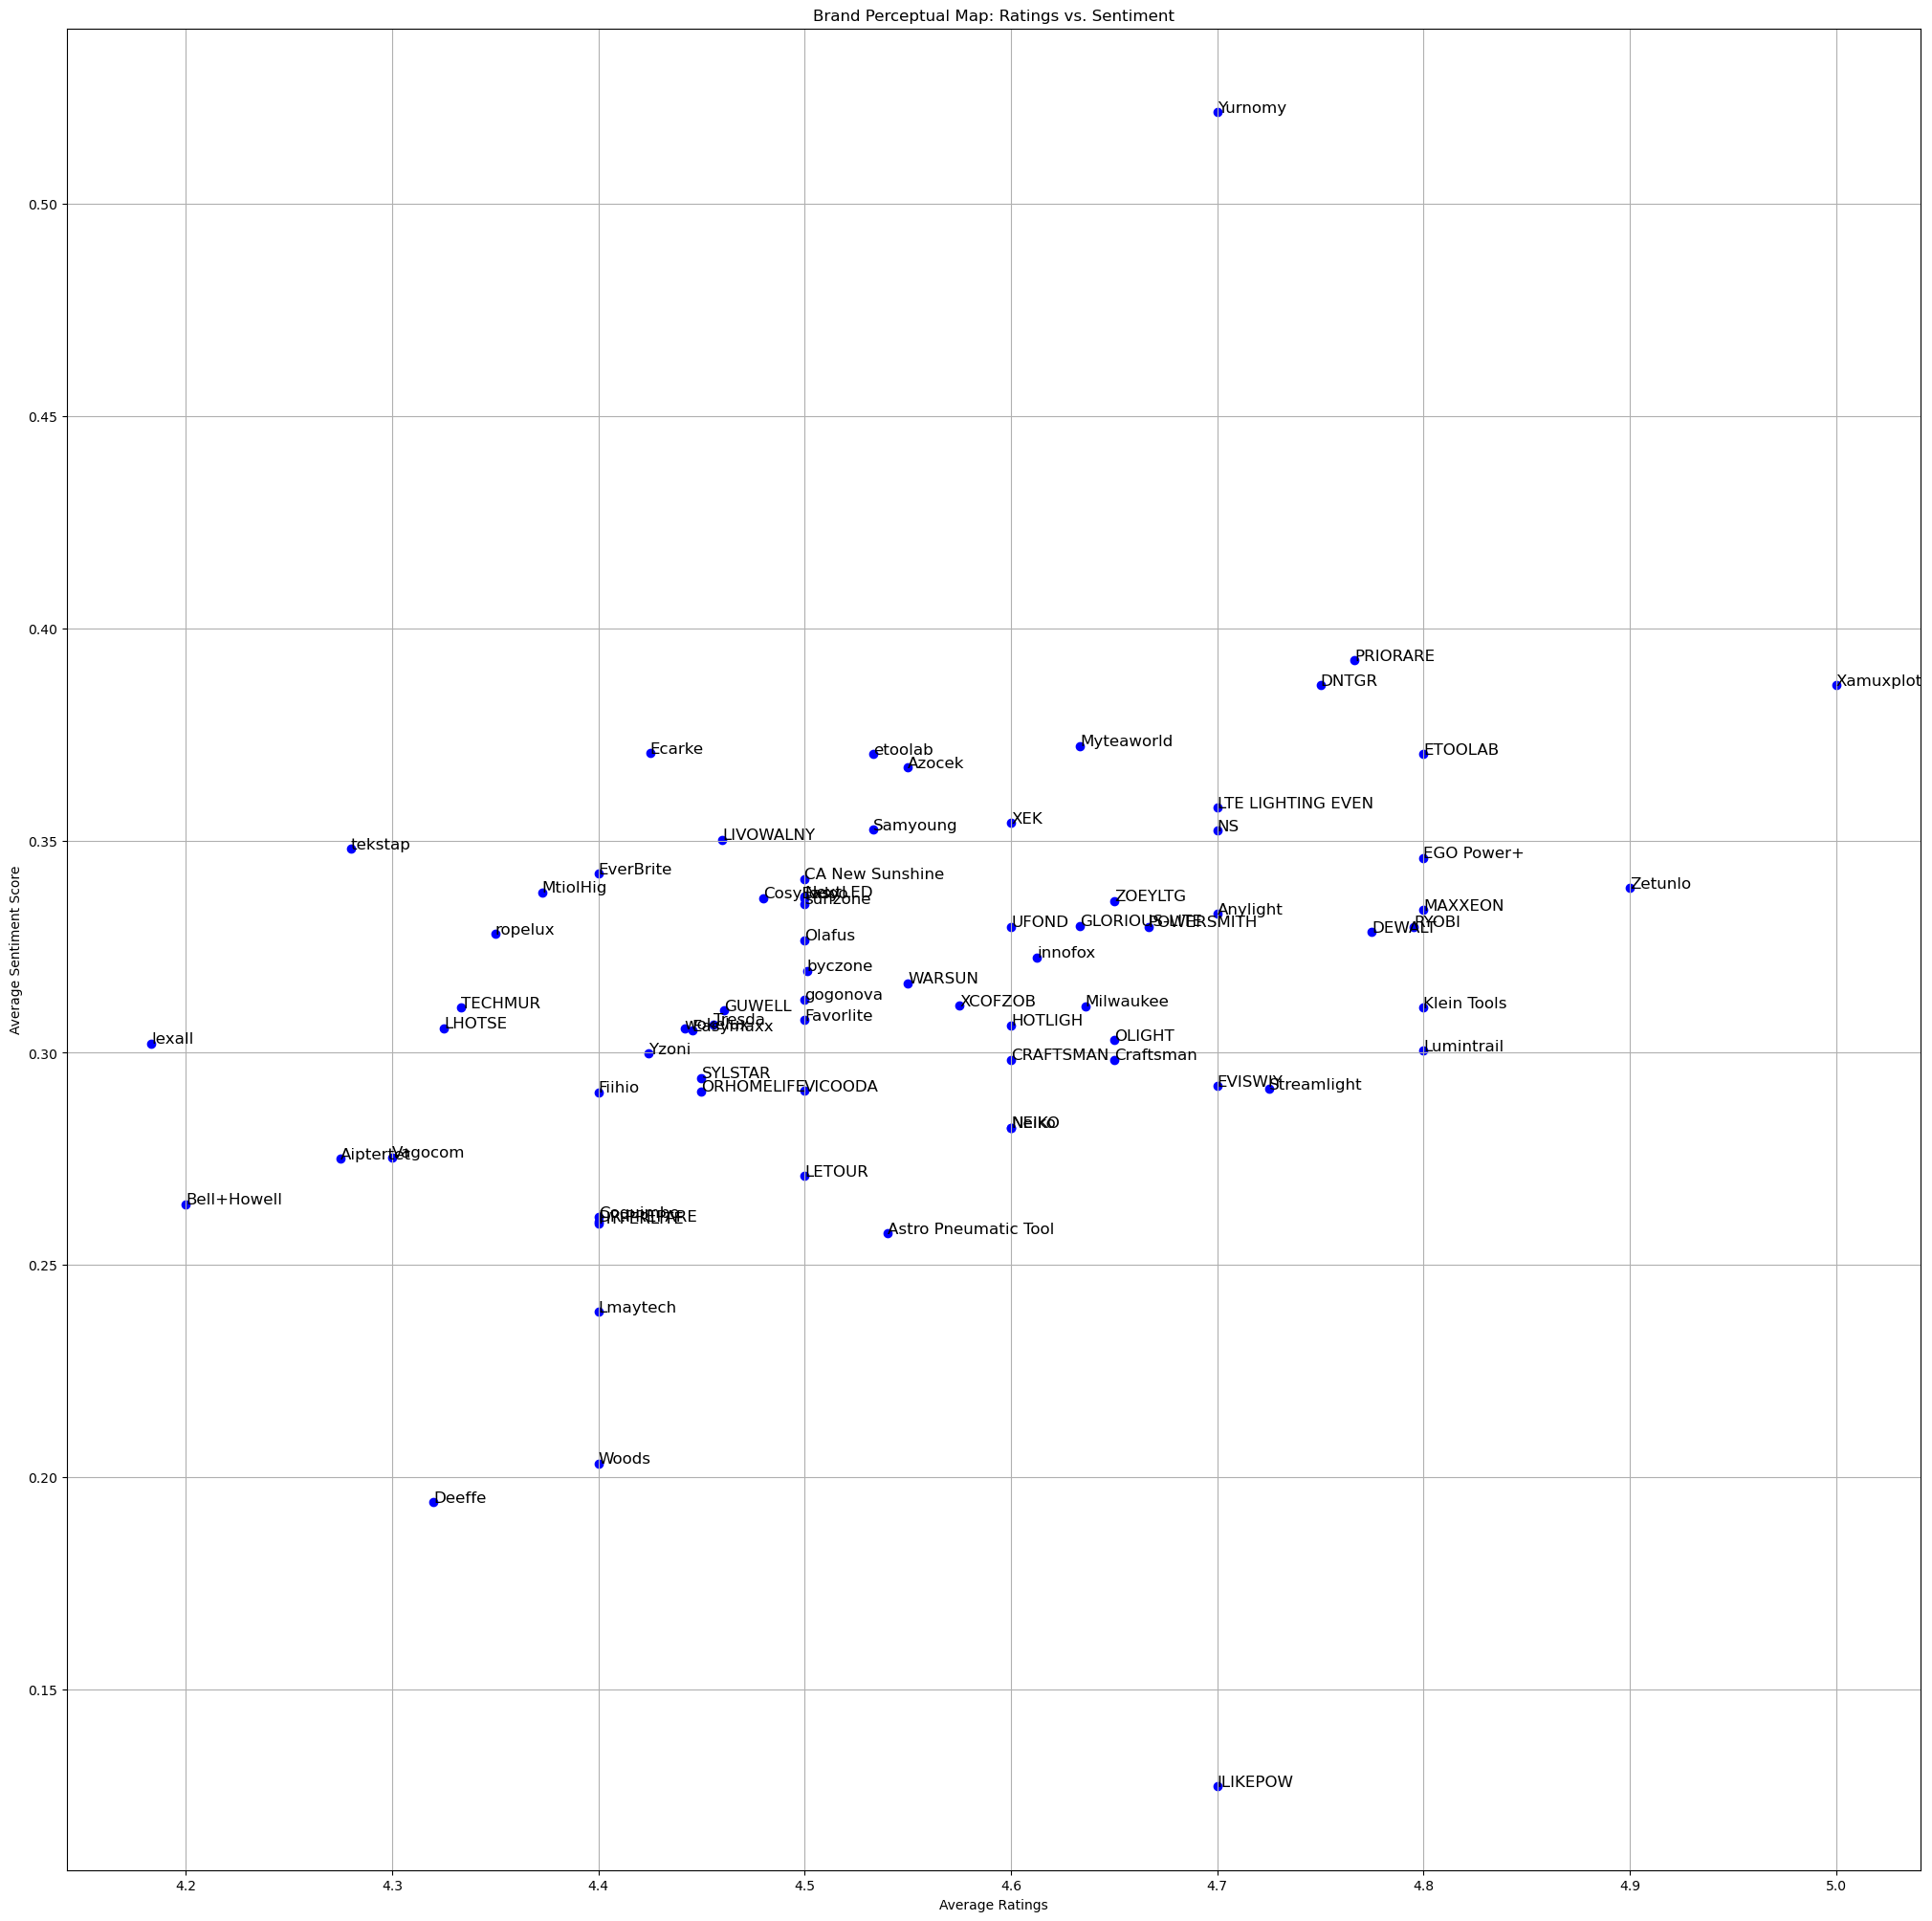

In [454]:
# Create a scatter plot for the brand perceptual map
plt.figure(figsize=(25, 25))
plt.scatter(brand_sentiment_ratings['Ratings'], brand_sentiment_ratings['sentiment'], color='blue')

# Annotate each point with the brand name
for i, brand in enumerate(brand_sentiment_ratings['Brand']):
    plt.text(brand_sentiment_ratings['Ratings'][i], brand_sentiment_ratings['sentiment'][i], brand, fontsize=12)

# Label the axes
plt.xlabel('Average Ratings')
plt.ylabel('Average Sentiment Score')
plt.title('Brand Perceptual Map: Ratings vs. Sentiment')
plt.grid(True)
plt.show()

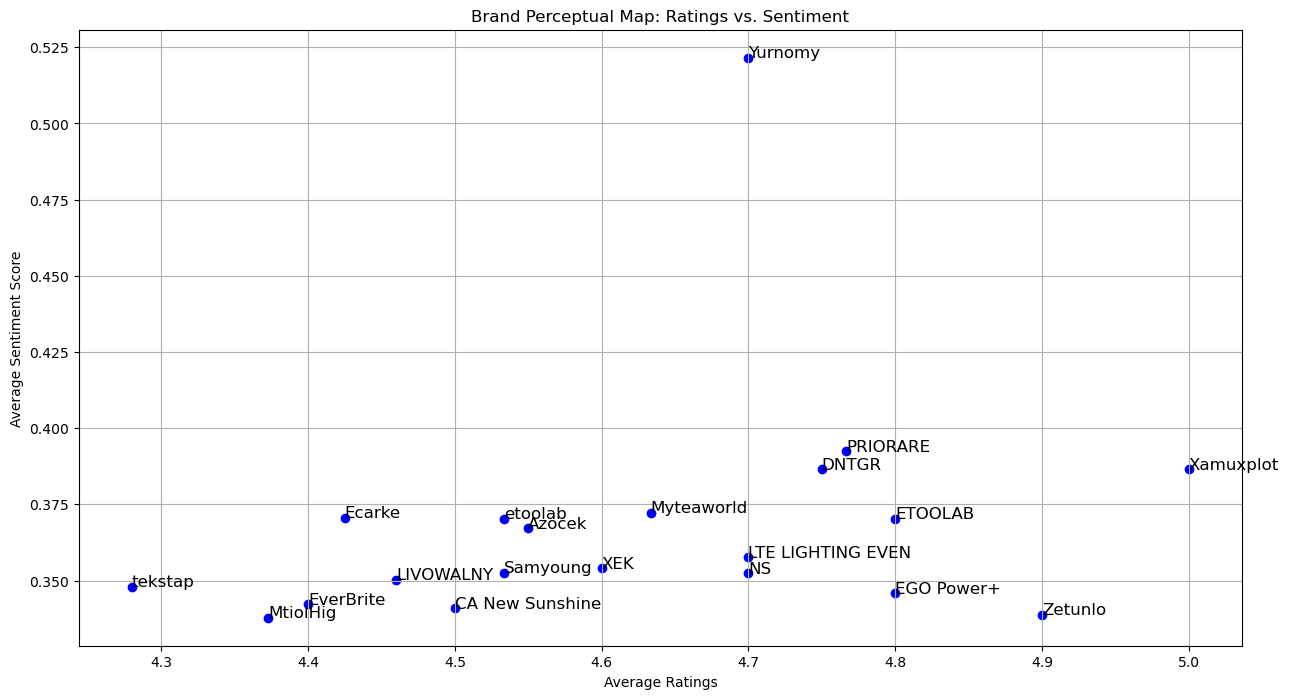

<Figure size 640x480 with 0 Axes>

In [455]:
sorted_brands = brand_sentiment_ratings.sort_values(by='sentiment', ascending=False).reset_index(drop=True)

# Filter top N brands
top_n = 20
top_brands = sorted_brands.head(top_n)

top_brands.head(20)

plt.figure(figsize=(15, 8))
plt.scatter(top_brands['Ratings'], top_brands['sentiment'], color='blue')

# Annotate each point with the brand name
for i, brand in enumerate(top_brands['Brand']):
    plt.text(top_brands['Ratings'][i], top_brands['sentiment'][i], brand, fontsize=12)

# Label the axes
plt.xlabel('Average Ratings')
plt.ylabel('Average Sentiment Score')
plt.title('Brand Perceptual Map: Ratings vs. Sentiment')
plt.grid(True)
plt.show()
plt.savefig('Brand Perceptual Map: Ratings vs. Sentiment.png')